In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data=pd.read_csv("Population_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [3]:
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [4]:
numeric =["Indians","Foreigners","Indian_Male",
         "Indian_Female","Foreigners_Female",
          "Foreigners_Male","Total Population"]

In [5]:
def cleaner(z):
    return z.replace(",","")

In [6]:
for i in data[numeric]:
    data[i]=data[i].apply(cleaner)
    
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [8]:
data[numeric] = data[numeric].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


# Integrity check


In [9]:
data[["Indians","Foreigners"]].sum().sum() - data["Total Population"].sum()

0

In [10]:
data[["Indian_Male","Indian_Female",
      "Foreigners_Male",
          "Foreigners_Female"]].sum().sum()- data["Total Population"].sum()

-112859

In [11]:
# Total pop > no.of male+ no. of female
MF_sum=data["Indian_Male"]+ data["Indian_Female"]+ data["Foreigners_Male"]+ data["Foreigners_Female"]
data["other"] = data["Total Population"] - MF_sum
data.head() 

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [12]:
data["Region"].nunique(), data["Office Location Id"].nunique()

(38, 38)

In [13]:
data1 = data.drop(columns = ["Region","Office Location Id","Total Population"])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
0,643596,2883782,440445,203151,2763718,72515,47549
1,319933,1501899,213477,106456,1449303,27671,24925
2,194379,650744,161803,32576,631660,10652,8432
3,107360,470708,85343,22017,450267,6389,14052
4,55351,329980,31796,23555,325105,3684,1191


In [14]:
data1.describe()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
count,38.000000,3.800000e+01,38.000000,38.000000,3.800000e+01,38.000000,38.000000
mean,46391.605263,2.212228e+05,33046.789474,13344.815789,2.141643e+05,4088.500000,2969.973684
std,116162.094523,5.153006e+05,80484.106060,36287.213891,4.944378e+05,12347.385218,8827.939172
min,686.000000,5.737000e+03,380.000000,214.000000,5.702000e+03,35.000000,0.000000
25%,4377.750000,2.688225e+04,3288.750000,1214.250000,2.660800e+04,206.750000,21.250000
50%,9628.500000,7.127250e+04,6534.500000,3308.500000,7.015700e+04,873.500000,138.000000
75%,26867.500000,1.472770e+05,18656.750000,7292.750000,1.442260e+05,2309.750000,536.750000
max,643596.000000,2.883782e+06,440445.000000,203151.000000,2.763718e+06,72515.000000,47549.000000


# Normalization

In [15]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = data1.columns
data1 = norm.fit_transform(data1)

data1 = pd.DataFrame(data1, columns = columns)
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544


In [16]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(data1)
pred= kmeans.predict(data1)


In [17]:
pred, len(pred)

(array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]),
 38)

In [18]:
pd.Series(pred).value_counts()

1    30
0     8
dtype: int64

In [19]:
kmeans.inertia_

0.028113285898827122

In [20]:
kmeans.score(data1)

-0.028113285898827115

In [21]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data1)
    SSE.append(kmeans.inertia_)

D:\Program Files D\Anaconda3-2020.07-Windows-x86_64\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Program Files D\Anaconda3-2020.07-Windows-x86_64\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Program Files D\Anaconda3-2020.07-Windows-x86_64\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Program Files D\Anaconda3-2020.07-Windows-x86_64\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in ve

In [22]:
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})

Text(0, 0.5, 'Inertia')

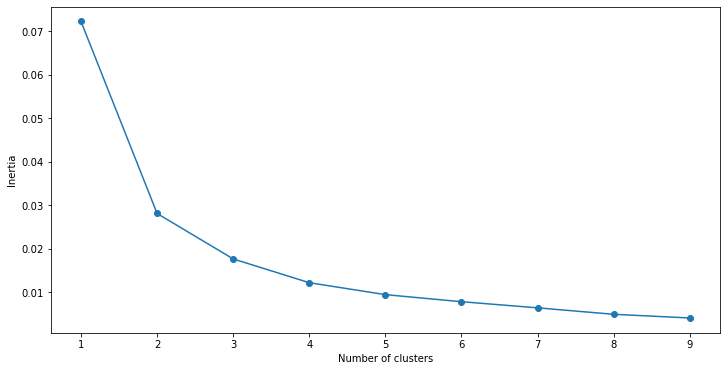

In [23]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data1)
pred=kmeans.predict(data1)

In [25]:
data1['cluster'] = pred

In [26]:
def seg(str_x, str_y, clusters):
  x = []
  y = []

  for i in range(clusters):
    x.append(data1[str_x][data1['cluster']==i])
    y.append(data1[str_y][data1['cluster']==i])
  
  return x,y

def plot_clusters(str_x, str_y, clusters):
  plt.figure(figsize = (5,5), dpi = 120)
  
  x,y = seg(str_x, str_y, clusters)

  for i in range(clusters):
    plt.scatter(x[i], y[i], label = 'cluster{}'.format(i))
  
  plt.xlabel(str_x)
  plt.ylabel(str_y)
  plt.title(str(str_x+" Vs "+str_y))
  plt.legend()

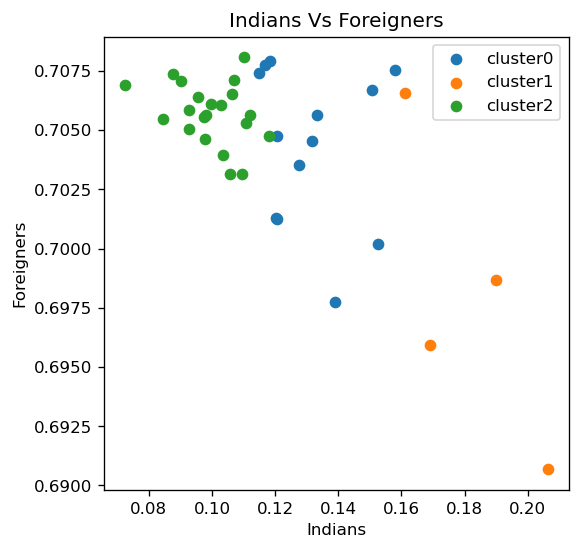

In [27]:
plot_clusters('Indians', 'Foreigners',3)

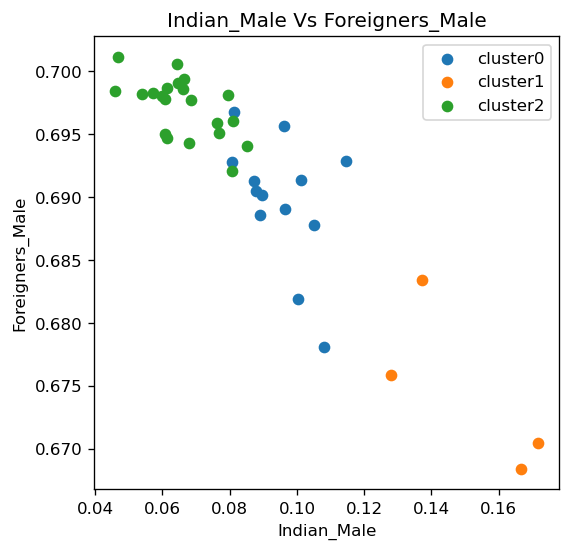

In [28]:
plot_clusters('Indian_Male', 'Foreigners_Male',3)

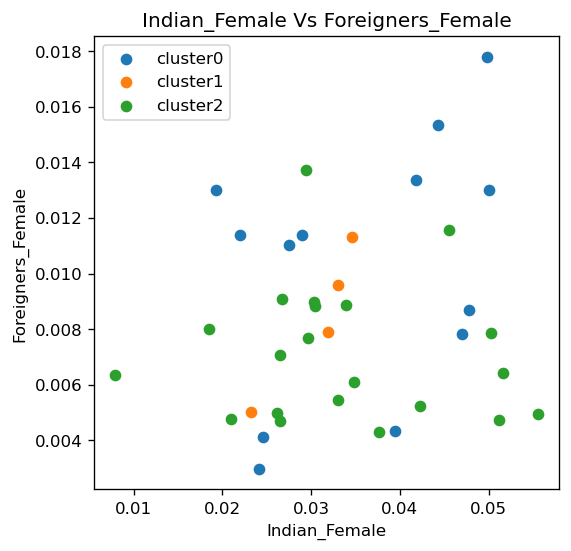

In [29]:
plot_clusters('Indian_Female', 'Foreigners_Female',3)

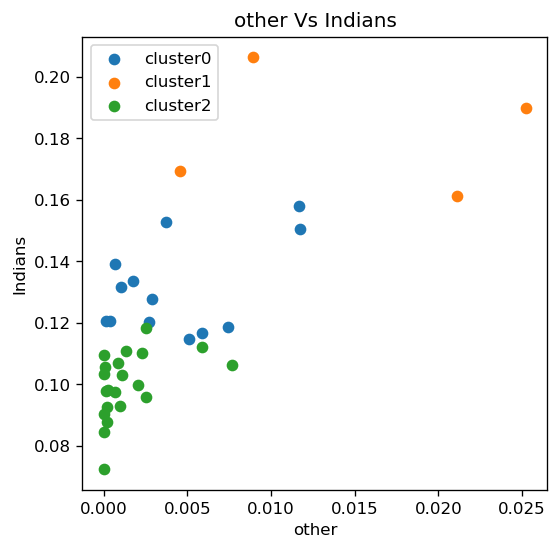

In [30]:
plot_clusters('other', 'Indians',3)

In [44]:
import joblib
joblib.dump(kmeans , "Population_data_cluster.pkl")
joblib.dump(plot_clusters , "Population_data_cluster2.pkl")

['Population_data_cluster2.pkl']

In [45]:
model=joblib.load("Population_data_cluster.pkl")
imgdata=joblib.load("Population_data_cluster2.pkl")

In [46]:
model.predict([[43437,232626,29633,13804,227870,4417,319]])

array([0])

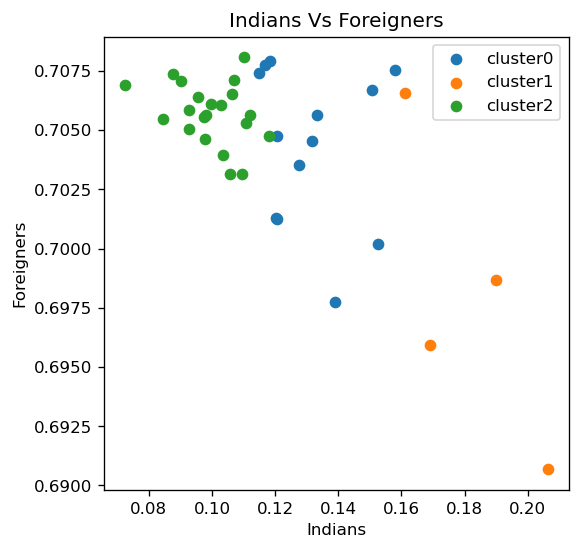

In [48]:
imgdata('Indians', 'Foreigners',3)